 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
file_path = Path('Resources/whale_returns.csv')
whale_df = pd.read_csv(file_path, index_col = "Date", infer_datetime_format=True, parse_dates=True).sort_index()
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace = True)

In [5]:
# Verify nulls dropped
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
file_path = Path('Resources/algo_returns.csv')
algo_df = pd.read_csv(file_path, index_col="Date", infer_datetime_format = True, parse_dates = True).sort_index()
algo_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [7]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace = True)

In [9]:
# Verify nulls dropped
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P 500 Closing Prices
file_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(file_path, index_col = "Date", parse_dates=True, infer_datetime_format=True).sort_index()
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [11]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$","")

<ipython-input-12-e5b38460c676>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$","")


In [13]:
# Cast Close values as floats
sp500_df["Close"] = sp500_df["Close"].astype("float")

In [14]:
# Verify $ sign dropped
sp500_df.tail()

,Close
Date,
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03
2019-04-22,2907.97
2019-04-23,2933.68


In [15]:
# Verify close values are floats
sp500_df.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [17]:
# Drop nulls
sp500_returns.dropna(inplace = True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [18]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.rename(columns={'Close':'S&P 500'}, inplace = True)
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([sp500_returns, whale_df, algo_df], axis='columns', join='inner')
combined_returns.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.004539,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.004389,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.001196,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.014174,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.003944,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Algorithmic Daily Returns'}, xlabel='Date'>

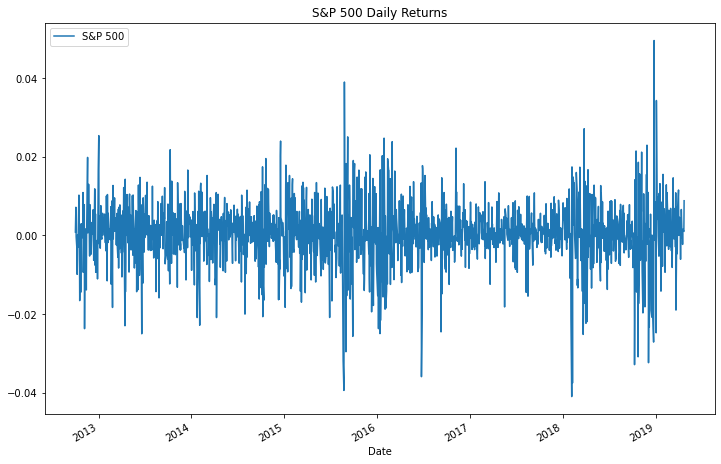

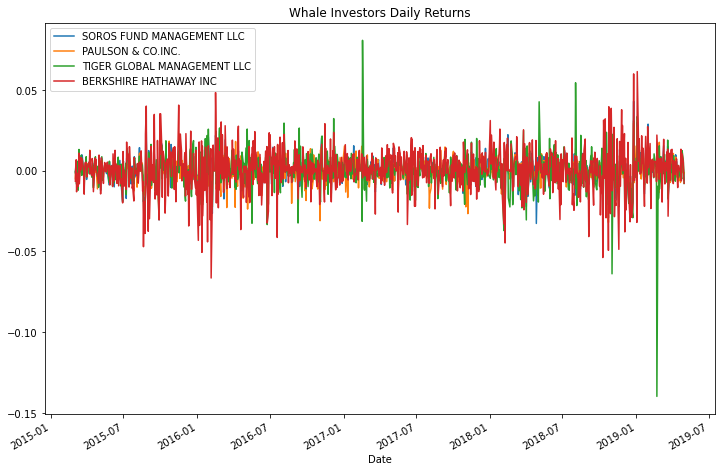

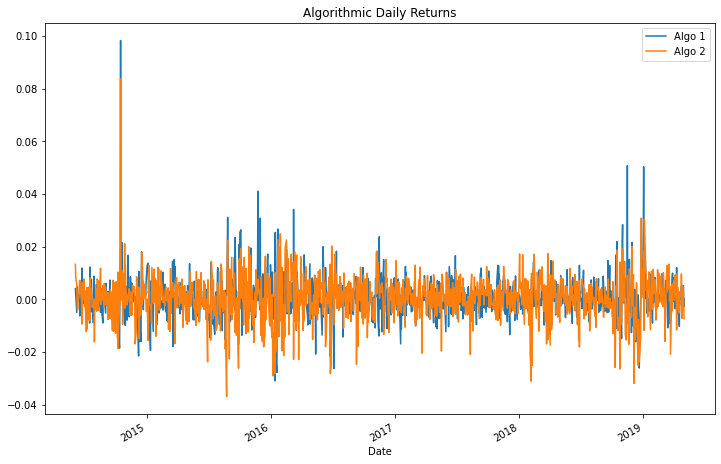

In [42]:
# Plot daily returns of all portfolios
sp500_returns.plot(figsize = (12, 8), title = "S&P 500 Daily Returns")
whale_df.plot(figsize = (12, 8), title = "Whale Investors Daily Returns")
algo_df.plot(figsize = (12, 8), title = "Algorithmic Daily Returns")

<AxesSubplot:xlabel='Date'>

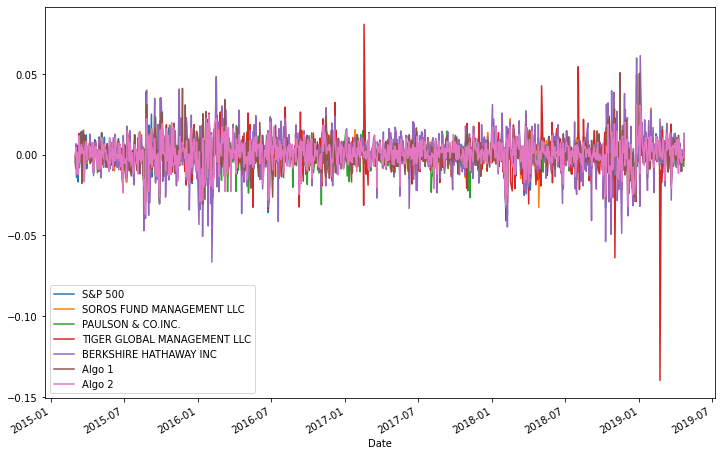

In [43]:
# Plot Combined Returns
combined_returns.plot(figsize = (12,8))

#### Calculate and Plot cumulative returns.

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod()
cumulative_returns.head()

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.995461,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051
2015-03-04,0.991093,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464
2015-03-05,0.992278,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794
2015-03-06,0.978214,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267
2015-03-09,0.982072,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

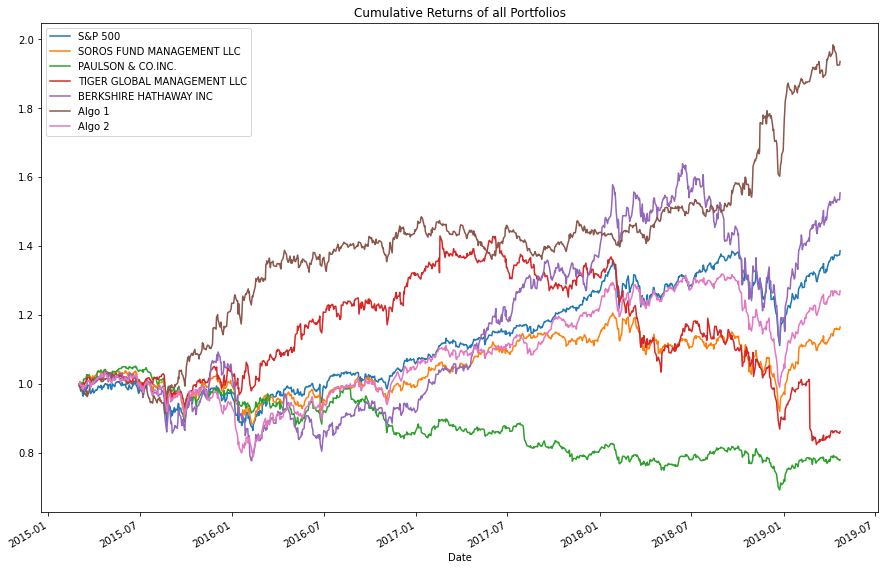

In [23]:
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,10), title = ("Cumulative Returns of all Portfolios"))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

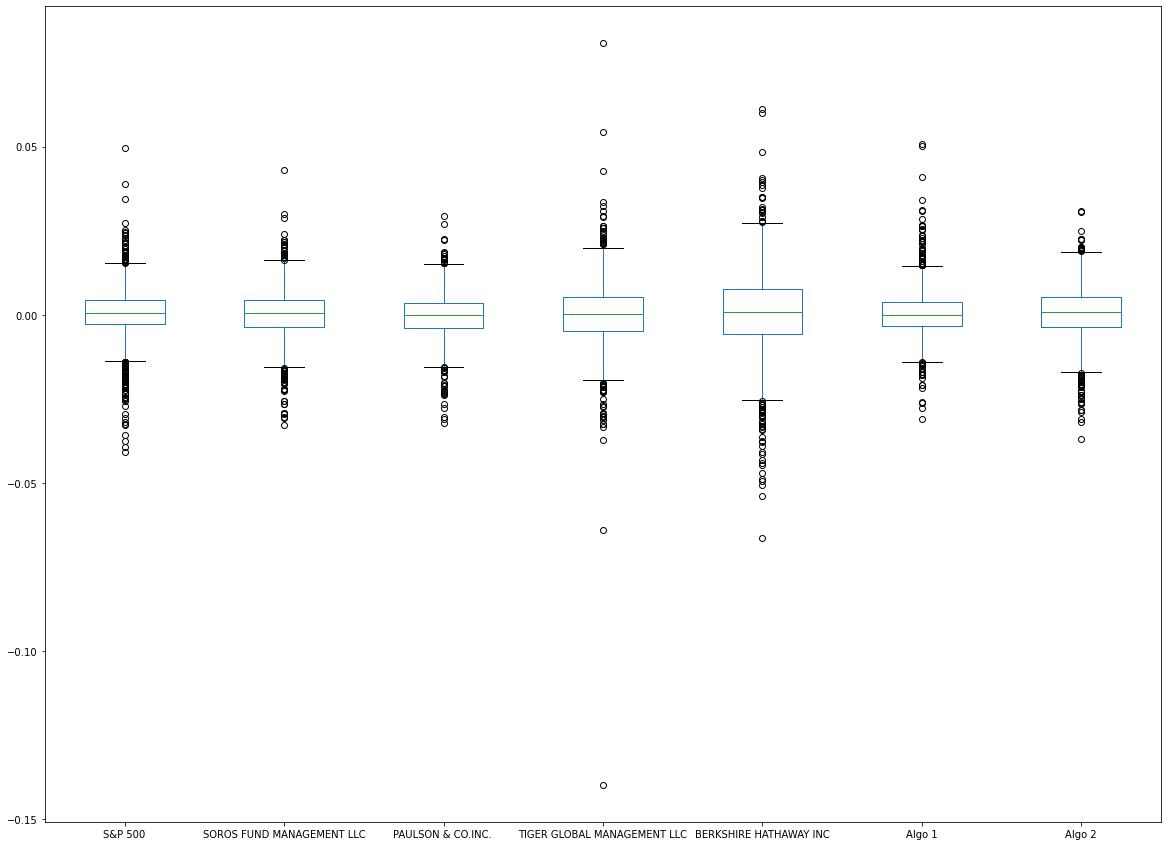

In [24]:
# Box plot to visually show risk
combined_returns.plot(kind = 'box', figsize = (20,15))

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_returns.std()
combined_std

S&P 500                        0.008554
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [26]:
# Calculate the daily standard deviation of S&P 500
sp500_std = sp500_returns.std()
sp500_std

# Noting the std of sp500 showing here as .008111 is different than its std of .008554 on combined_std df since 
# combined built on inner join of all portfolios, removing years of sp500 close data not shared 
# amongst other data sets

S&P 500    0.008111
dtype: float64

In [27]:
# Determine which portfolios are riskier than the S&P 500
combined_std.sort_values(inplace = True, ascending = False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [28]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [29]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_returns.rolling(window=21).std()
rolling_std.head(30)

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation of All Portfolios'}, xlabel='Date'>

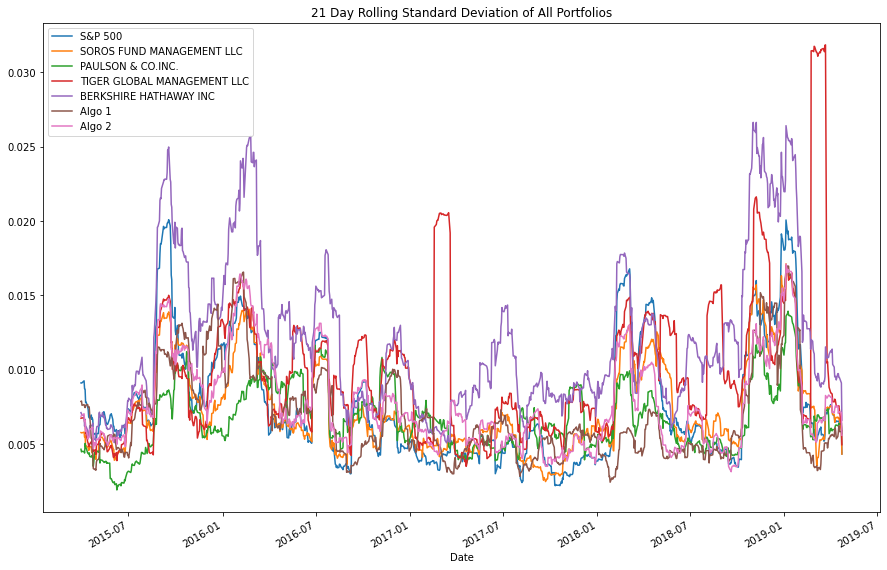

In [30]:
# Plot the rolling standard deviation
rolling_std.plot(figsize = (15,10), title = ("21 Day Rolling Standard Deviation of All Portfolios"))

### Calculate and plot the correlation

In [31]:
# Calculate the correlation
correlation_df = combined_returns.corr()
 
# Display correlation matrix
correlation_df

,S&P 500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
S&P 500,1.000000,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764
SOROS FUND MANAGEMENT LLC,0.837864,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873
PAULSON & CO.INC.,0.669732,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414
BERKSHIRE HATHAWAY INC,0.751371,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082
Algo 1,0.279494,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243
Algo 2,0.858764,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000


<AxesSubplot:>

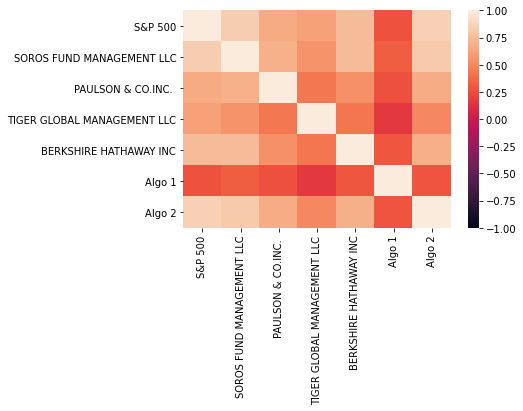

In [32]:
# Plot correlation using heatmap
sns.heatmap(correlation_df, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [33]:
# Calculate covariance of a single portfolio
covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].cov(combined_returns['SP 500'])
covariance

KeyError: 'SP 500'

In [ ]:
# Calculate variance of S&P 500
variance = combined_returns['SP 500'].var()
variance

In [ ]:
# Computing beta
soros_beta = covariance/variance
soros_beta

In [ ]:
# Plot beta trend
rolling_covariance = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(combined_returns['SP 500'])
rolling_variance = combined_returns['SP 500'].rolling(window = 60).var()
rolling_beta = rolling_covariance/rolling_variance
rolling_beta.plot(title = "Rolling 60-day Beta for Soros", figsize = (15,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window
mean_combined_returns = combined_returns.ewm(halflife = 21).mean()
mean_combined_returns

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_std * np.sqrt(252))
sharpe_ratios.sort_values(inplace = True, ascending = False)
sharpe_ratios

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title = "Sharpe Ratios of All Portfolios ", figsize = (15,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 has the highest sharpe ratio at 1.37, Berkshire in second with 0.61, and Algo 2 third at 0.48. This is indicates that Algo 1 has the highest expected reward per given expected risk out of any portfolio. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!